In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob
from tqdm import tqdm 
import os
import shutil

import sys
sys.path.append('../src')

import utils

In [2]:
!chdir

H:\My Drive\Projects\yolo-segmentation-tool\notebooks


In [3]:
dataset_PATH = "../data/example_dataset_1_YOLO"

# Read the Annotation Files

# Use `draw_annotations` from Library

Processing in train...


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

image_PATH:  ../data/example_dataset_1_YOLO/train//images\vertical_1.jpg
image_name:  vertical_1.jpg
label_PATH:  ../data/example_dataset_1_YOLO/train//labels/vertical_1.txt


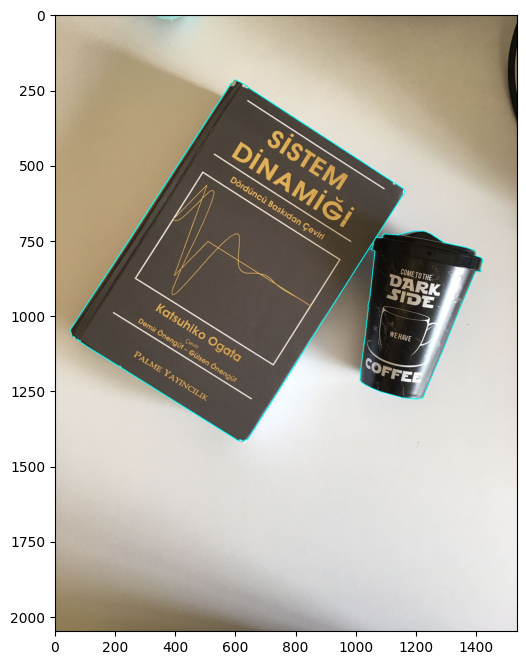

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.25it/s]

image_PATH:  ../data/example_dataset_1_YOLO/train//images\vertical_2.jpg
image_name:  vertical_2.jpg
label_PATH:  ../data/example_dataset_1_YOLO/train//labels/vertical_2.txt


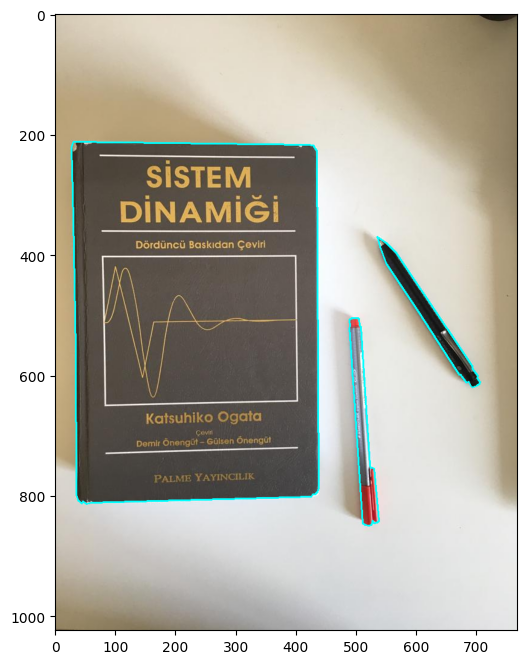

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.73it/s]


Processing in test...


0it [00:00, ?it/s]


Processing in val...


0it [00:00, ?it/s]


In [4]:
# reading annotations from files and draw o image

# find all images and annotations in the train, test, and val folders if they exists
for folder in glob.glob(dataset_PATH+"/*/"):
    folder_name = folder.split("\\")[-2]    # it suppose to be train, test, val
    print(f"Processing in {folder_name}...")
    
    sub_folder_PATH = f"{dataset_PATH}/{folder_name}/"    #  PATH of train, test, val
    
    # sub_folders_names = ["images", "labels"]
    
    for image_PATH in tqdm(glob.glob(sub_folder_PATH+"/images/*")):
        image_name = image_PATH.split("\\")[-1]
        label_PATH = f"{sub_folder_PATH}/labels/{image_name.split('.')[0]}.txt"
        
        print("image_PATH: ", image_PATH)
        print("image_name: ", image_name)
        print("label_PATH: ", label_PATH)
        
        image = cv2.imread(image_PATH)
        
        image = utils.draw_annotations(label_PATH, image)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

# Rotating Annotations and Images

Processing in train...


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

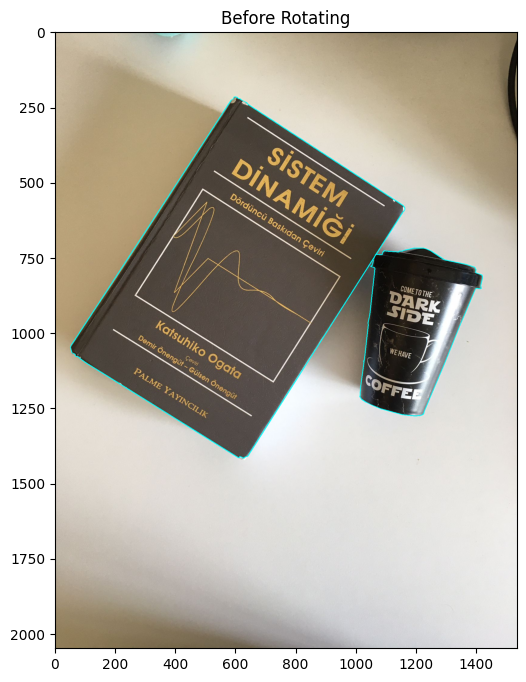

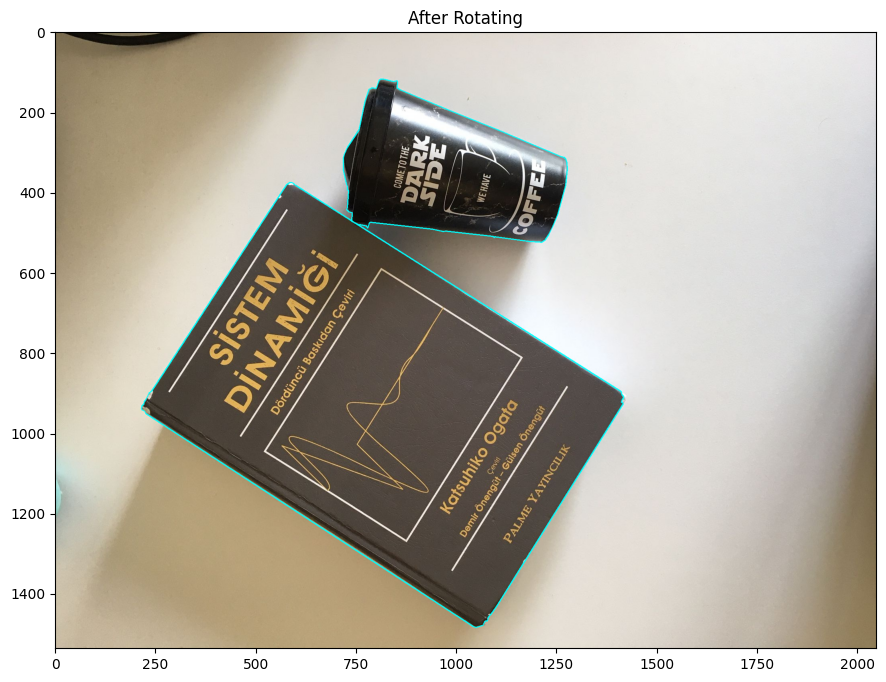

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.72s/it]

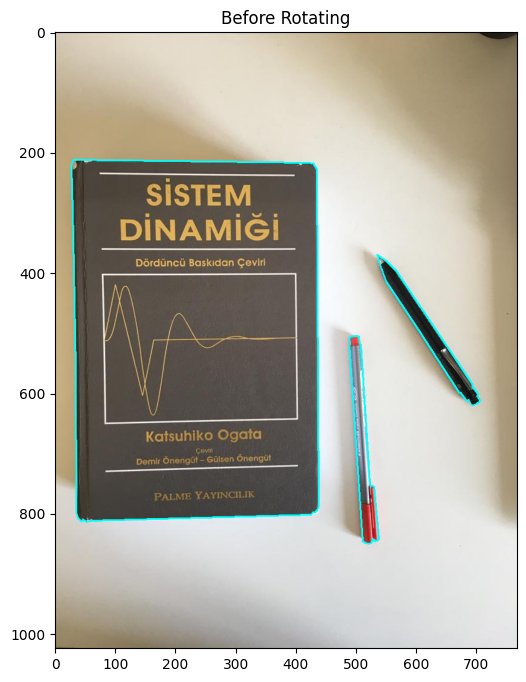

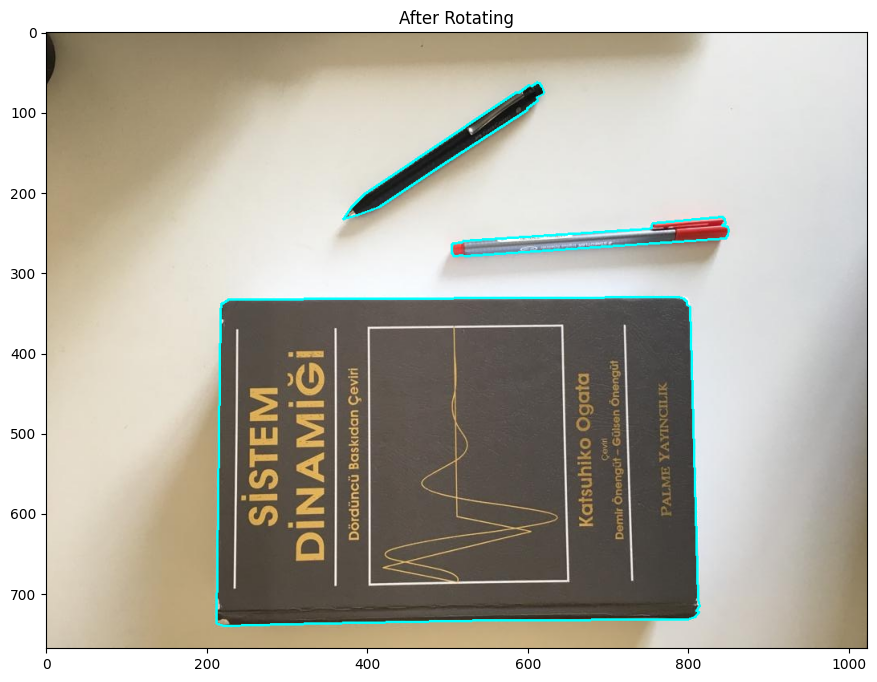

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


Processing in test...


0it [00:00, ?it/s]


Processing in val...


0it [00:00, ?it/s]


In [5]:
# reading annotations from files and draw o image

def rotate_and_save_dataset(dataset_PATH, output_folder_PATH=" "):
    
    # create rotated dataset directory
    output_folder_PATH = f"{dataset_PATH}_rotated"
    os.makedirs(output_folder_PATH, exist_ok=True)  
    shutil.copy(f'{dataset_PATH}/data.yaml', f'{output_folder_PATH}/data.yaml')  # save the data.yaml file
    
    # find all images and annotations in the train, test, and val folders if they exist
    for folder in glob.glob(dataset_PATH+"/*/"):
        
        folder_name = folder.split("\\")[-2]    # it suppose to be train, test, val
        print(f"Processing in {folder_name}...")
        
        # creating subfolders - train-test-val / images-labels
        ouput_sub_folder_PATH =f"{output_folder_PATH}/{folder_name}"
        ouput_sub_folder_images_PATH =f"{output_folder_PATH}/{folder_name}/images"
        ouput_sub_folder_labels_PATH =f"{output_folder_PATH}/{folder_name}/labels"
        os.makedirs(ouput_sub_folder_PATH, exist_ok=True)  # create new train test val directory if they exist
        os.makedirs(ouput_sub_folder_images_PATH, exist_ok=True)
        os.makedirs(ouput_sub_folder_labels_PATH, exist_ok=True)  

        sub_folder_PATH = f"{dataset_PATH}/{folder_name}/"    #  PATH of train, test, val folders

        for image_PATH in tqdm(glob.glob(sub_folder_PATH+"/images/*")):
            image_name = image_PATH.split("\\")[-1]
            label_PATH = f"{sub_folder_PATH}/labels/{image_name.split('.')[0]}.txt"

            # print("image_PATH: ", image_PATH)
            # print("image_name: ", image_name)
            # print("label_PATH: ", label_PATH)

            # Before Rotating
            image = cv2.imread(image_PATH)
            image = utils.draw_annotations(label_PATH, image)   # draw annotations
            
            plt.figure(figsize=(12, 8))
            plt.title("Before Rotating")
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))            
            plt.show()

            # Starting Rotating
            ouput_sub_folder_labels_PATH =f"{output_folder_PATH}/{folder_name}/labels"
            
            # Rotate annotations and images. CCW 90 degree
            # TODO: Angle just works with -90 degree right now.
            image = cv2.imread(image_PATH)
            rotated_annotation_file_PATH, rotated_image_PATH = utils.rotate_annotations(label_PATH,
                                                                                        ouput_sub_folder_PATH,
                                                                                        image_name,
                                                                                        image,
                                                                                        cx=0.5,
                                                                                        cy=0.5,
                                                                                        angle=np.radians(-90))
            
            # Draw the rotated annotation
            rotated_image = cv2.imread(rotated_image_PATH)   # Read the image again in case it has been changed
            image = utils.draw_annotations(rotated_annotation_file_PATH, rotated_image)   # draw annotations on rotated images
            
            
            plt.figure(figsize=(12, 8))
            plt.title("After Rotating")
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.show()
        
        
rotate_and_save_dataset(dataset_PATH)

# How to Create New Line for Rotations Points and Annotations

In [6]:
a = np.array([1, 2, 3, 4])
b = np.array([11, 22, 33, 44])

new_list = list(zip(a,b))
print(new_list)

[(1, 11), (2, 22), (3, 33), (4, 44)]


In [7]:
flat_list = [item for sublist in new_list for item in sublist]
# flat_list = str(flat_list)
print((' '.join(map(str, flat_list))))

1 11 2 22 3 33 4 44


In [8]:
class_id = 0

f"{class_id} {(' '.join(map(str, flat_list)))} \n"

'0 1 11 2 22 3 33 4 44 \n'

In [9]:
image_name.split(".")[0]

'vertical_2'